# Final Project

In [406]:
# Imports
import numpy as np
import math

from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.decomposition import PCA

import astropy
from astropy.io import ascii

import scipy

# Use AstroML Plot Style
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
%matplotlib inline

In [422]:
# Import data
raw_data = ascii.read('SDSS_quasar.dat')

In [101]:
# Display data
raw_data

SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,i_mag,sig_i,z_mag,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000710.01+005329.1,1.791724,0.89142,0.3162,17.802,0.018,17.563,0.036,17.306,0.021,17.386,0.019,16.542,0.016,15.924,-0.981,15.986,0.07,15.166,0.094,14.361,0.063,-23.62
001130.40+005751.8,2.876667,0.964393,1.4915,20.585,0.078,20.411,0.027,20.319,0.031,20.137,0.04,20.365,0.172,10.789,-1.573,0.0,0.0,0.0,0.0,0.0,0.0,-24.598
003553.03-091150.1,8.970983,-9.197272,1.0044,20.39,0.062,19.887,0.024,19.3,0.017,19.019,0.022,18.832,0.047,11.504,-1.604,0.0,0.0,0.0,0.0,0.0,0.0,-24.791
004319.73+005115.4,10.832238,0.854296,0.3081,17.9,0.034,17.939,0.026,17.809,0.018,17.882,0.015,17.096,0.02,16.306,-1.204,16.391,0.118,15.434,0.127,14.668,0.081,-23.036
005441.19+000110.6,13.671658,0.019628,0.6466,18.625,0.024,18.266,0.021,18.214,0.028,17.91,0.024,17.877,0.029,15.179,-1.258,16.813,0.128,15.914,0.148,15.0,0.131,-24.812
005550.75-101905.6,13.961487,-10.318247,0.3091,18.906,0.031,18.654,0.029,18.448,0.041,18.422,0.032,17.726,0.025,15.61,-1.539,17.112,0.169,16.251,0.163,15.556,0.172,-22.535
005729.13-093258.4,14.371381,-9.549582,0.558,18.588,0.023,18.333,0.021,18.323,0.019,18.13,0.017,18.121,0.031,15.703,-1.574,16.695,0.15,16.387,0.221,15.358,0.185,-24.27
005917.47-091953.7,14.822824,-9.331604,0.6409,19.404,0.052,19.055,0.024,19.011,0.025,19.031,0.022,19.081,0.065,12.677,-1.688,0.0,0.0,0.0,0.0,0.0,0.0,-23.699
010644.15-103410.5,16.683995,-10.569598,0.4677,18.196,0.018,17.936,0.026,18.102,0.014,17.883,0.019,17.706,0.025,11.129,-1.142,16.642,0.127,15.762,0.116,15.469,0.177,-24.068


In [423]:
# Create masks to exclude incomplete data
radio_mask = [r > 0.0 for r in np.array(raw_data['Radio'])]
x_ray_mask = [x != -9.0 for x in np.array(raw_data['X-ray'])]
full_mask = [r and x for r,x in zip(radio_mask, x_ray_mask)]
to_remove = []
for i, v in enumerate(full_mask):
    if v == False:
        to_remove.append(i)
raw_data.remove_rows(to_remove)

# Collect data into np arrays
ra_data = np.array(raw_data['R.A.'])
dec_data = np.array(raw_data['Dec.'])
rs_data = np.array(raw_data['z'])
u_data = np.array(raw_data['u_mag'])
g_data = np.array(raw_data['g_mag'])
r_data = np.array(raw_data['r_mag'])
i_data = np.array(raw_data['i_mag'])
z_data = np.array(raw_data['z_mag'])
radio_data = np.array(raw_data['Radio'])
x_ray_data = np.array(raw_data['X-ray'])
j_mag_data = np.array(raw_data['J_mag'])
h_mag_data = np.array(raw_data['H_mag'])
k_mag_data = np.array(raw_data['K_mag'])
m_data = np.array(raw_data['M_i'])

data = np.array([rs_data, u_data, g_data,
                 r_data, i_data, z_data, radio_data, x_ray_data,
                  m_data]).T

# Preform PCA on subsetted data
pca = PCA().fit(data)

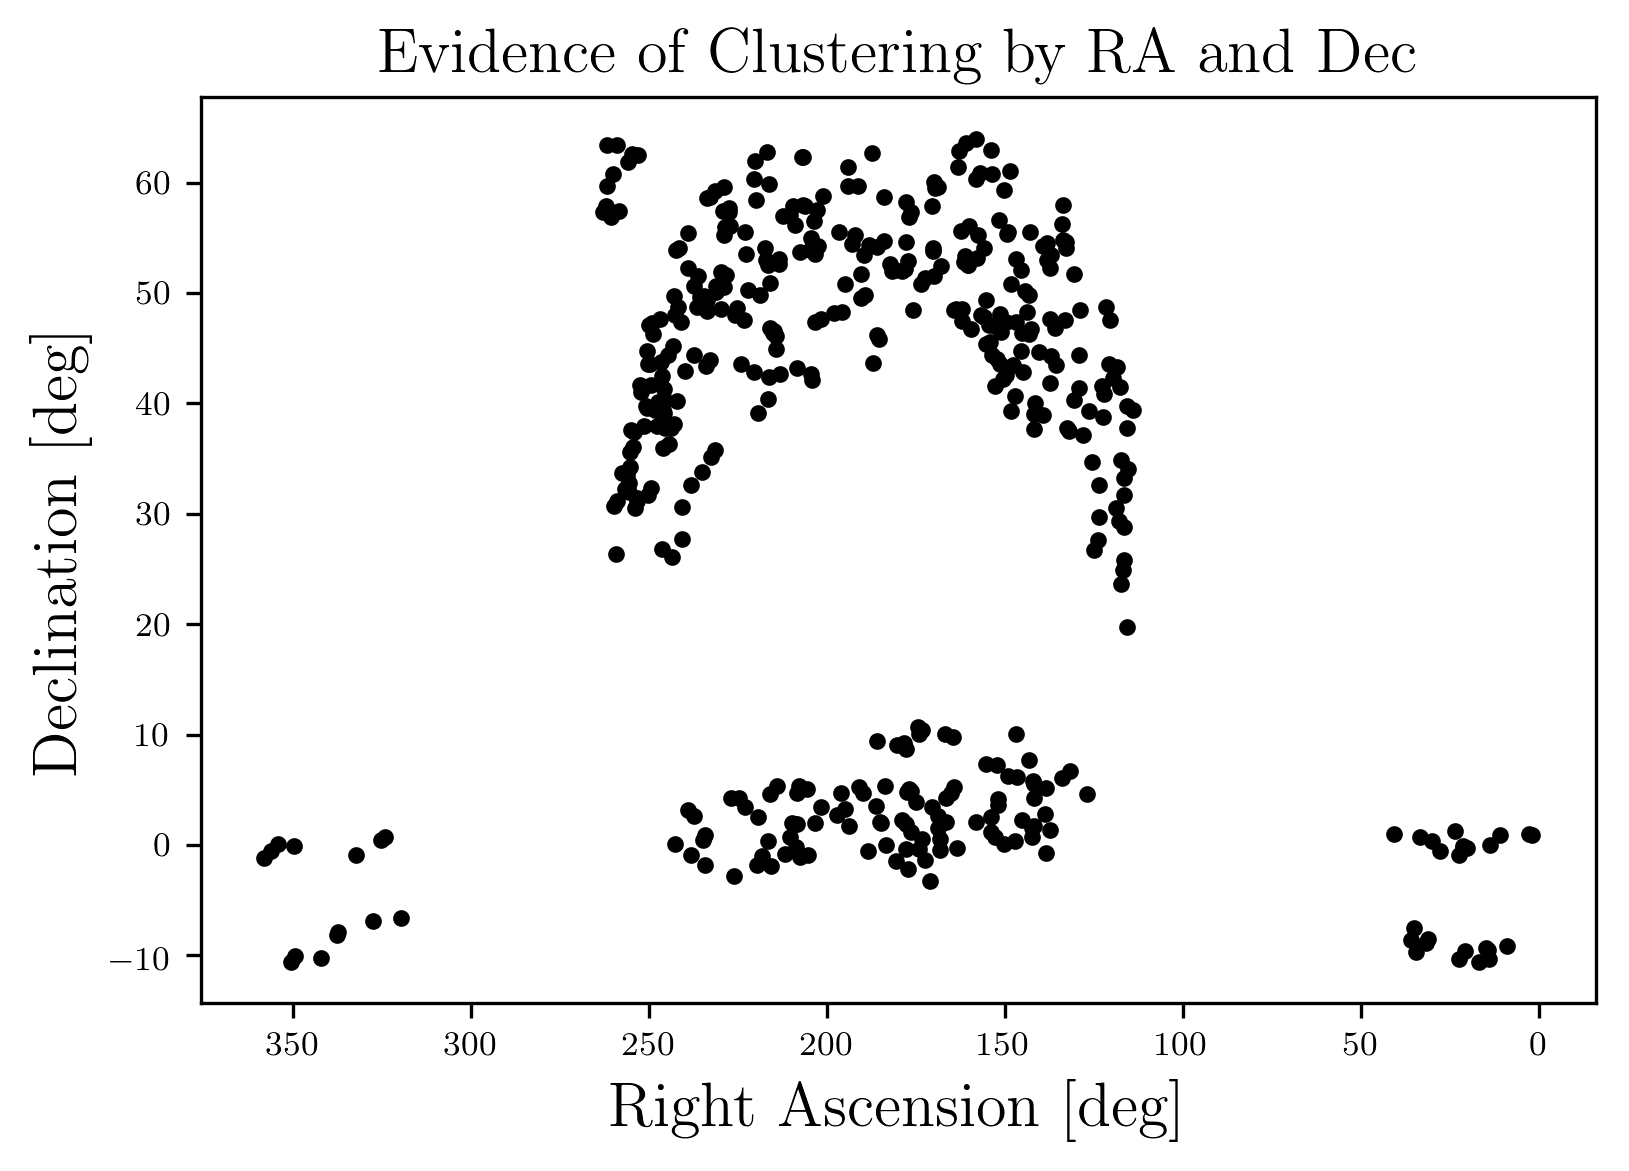

In [425]:
# Show ancillary clusters in Dec vs RA
fig, ax = plt.subplots(dpi = 300);
ax.scatter(raw_data['R.A.'], raw_data['Dec.'], marker = '.', c = 'k');
ax.set_xlabel('Right Ascension [deg]');
ax.set_ylabel('Declination [deg]');
ax.invert_xaxis();
plt.title('Evidence of Clustering by RA and Dec');

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(15)
plt.savefig('figures/ra-dec.pdf')

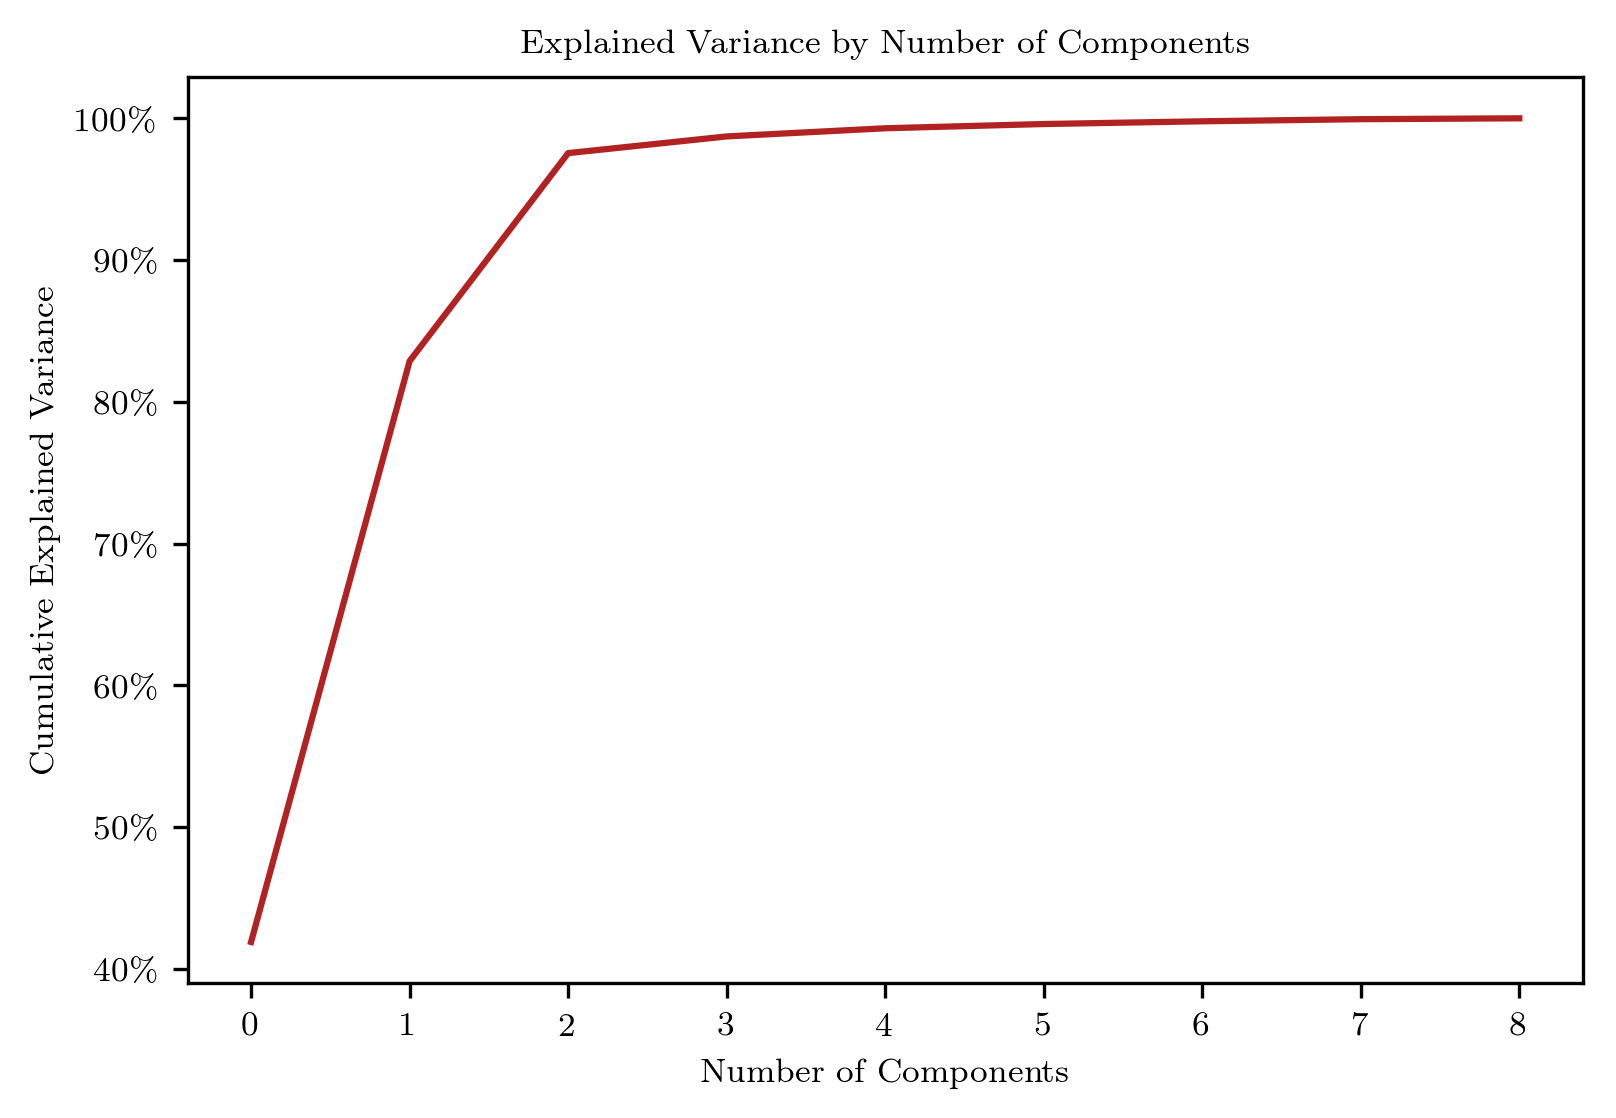

In [424]:
# Plot variance by components
def asPercent(x, pos):
    return u"{0:1.0f}$\%$".format(x * 100)

fig, ax = plt.subplots(dpi = 300);
ax.yaxis.set_major_formatter(FuncFormatter(asPercent));
ax.plot(np.cumsum(pca.explained_variance_ratio_), color = 'firebrick');
plt.xlabel('Number of Components');
plt.ylabel('Cumulative Explained Variance');
plt.title('Explained Variance by Number of Components');

plt.savefig('figures/exp-var.pdf');

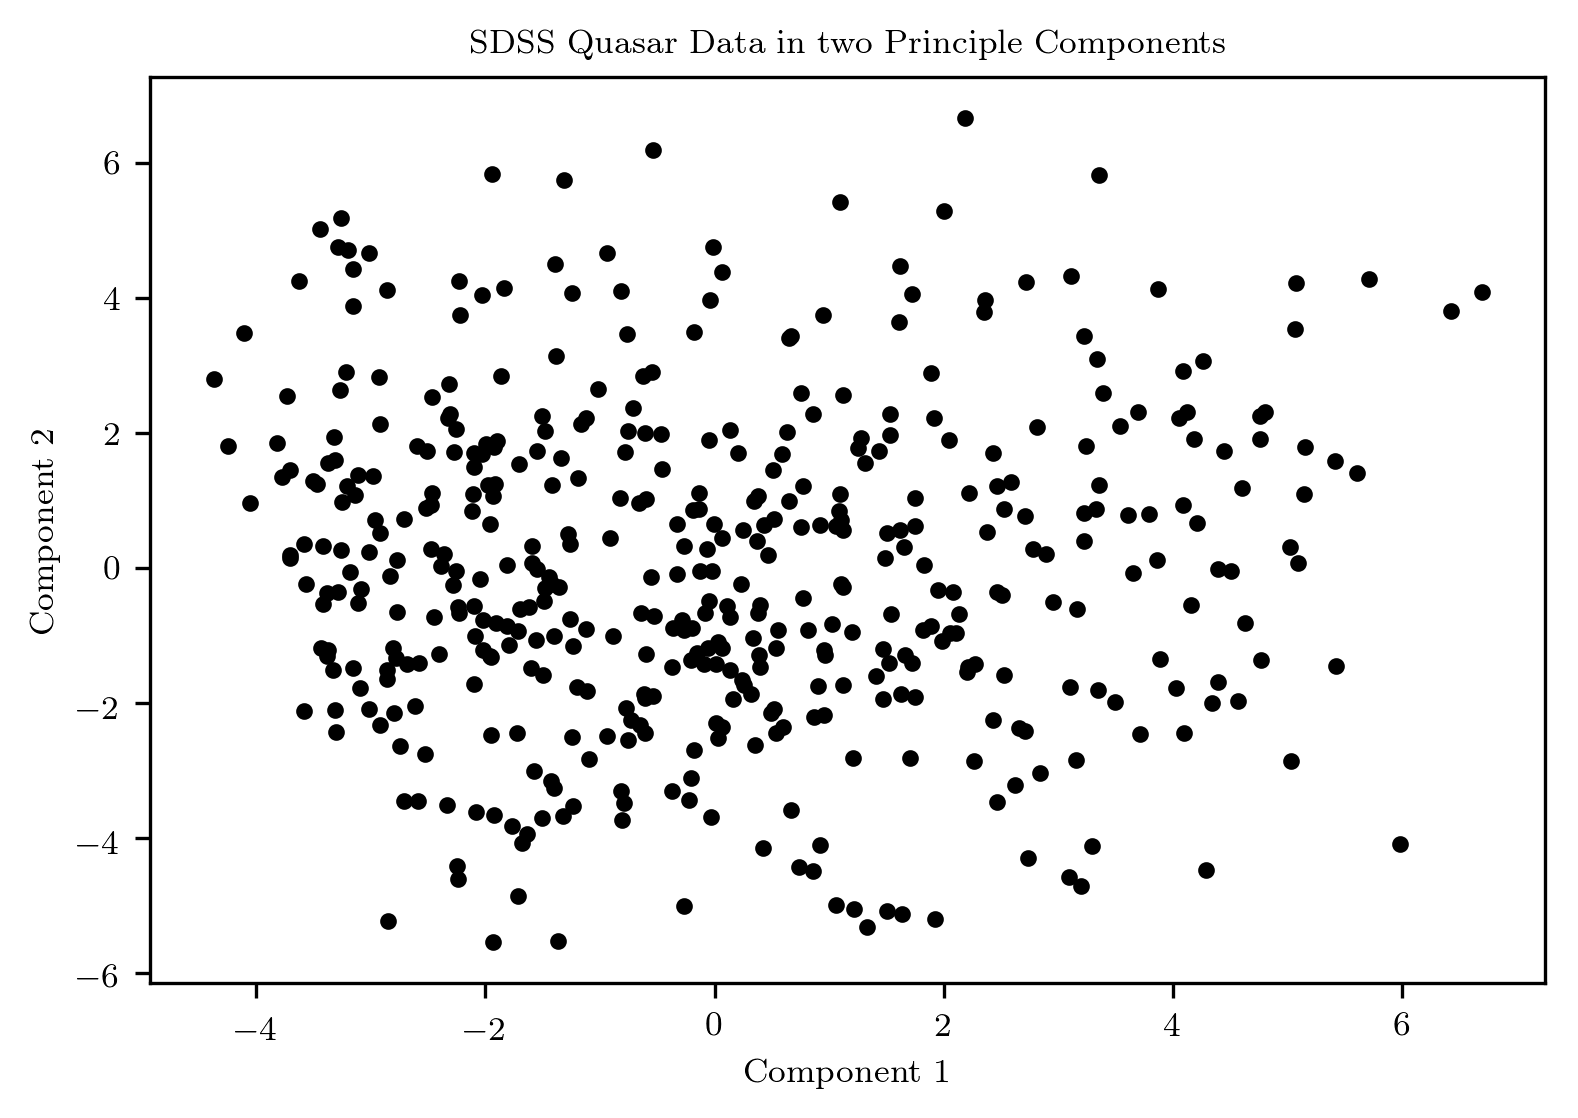

In [504]:
# Preform PCA for n_comp = 2, based on above graph
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

fig, ax = plt.subplots(dpi = 300);
ax.scatter(pca_data[:, 0], pca_data[:, 1], marker = '.', c = 'k');
ax.set_xlabel("Component 1");
ax.set_ylabel("Component 2");
plt.title("SDSS Quasar Data in two Principle Components");

plt.savefig('figures/pca-reduced.pdf')

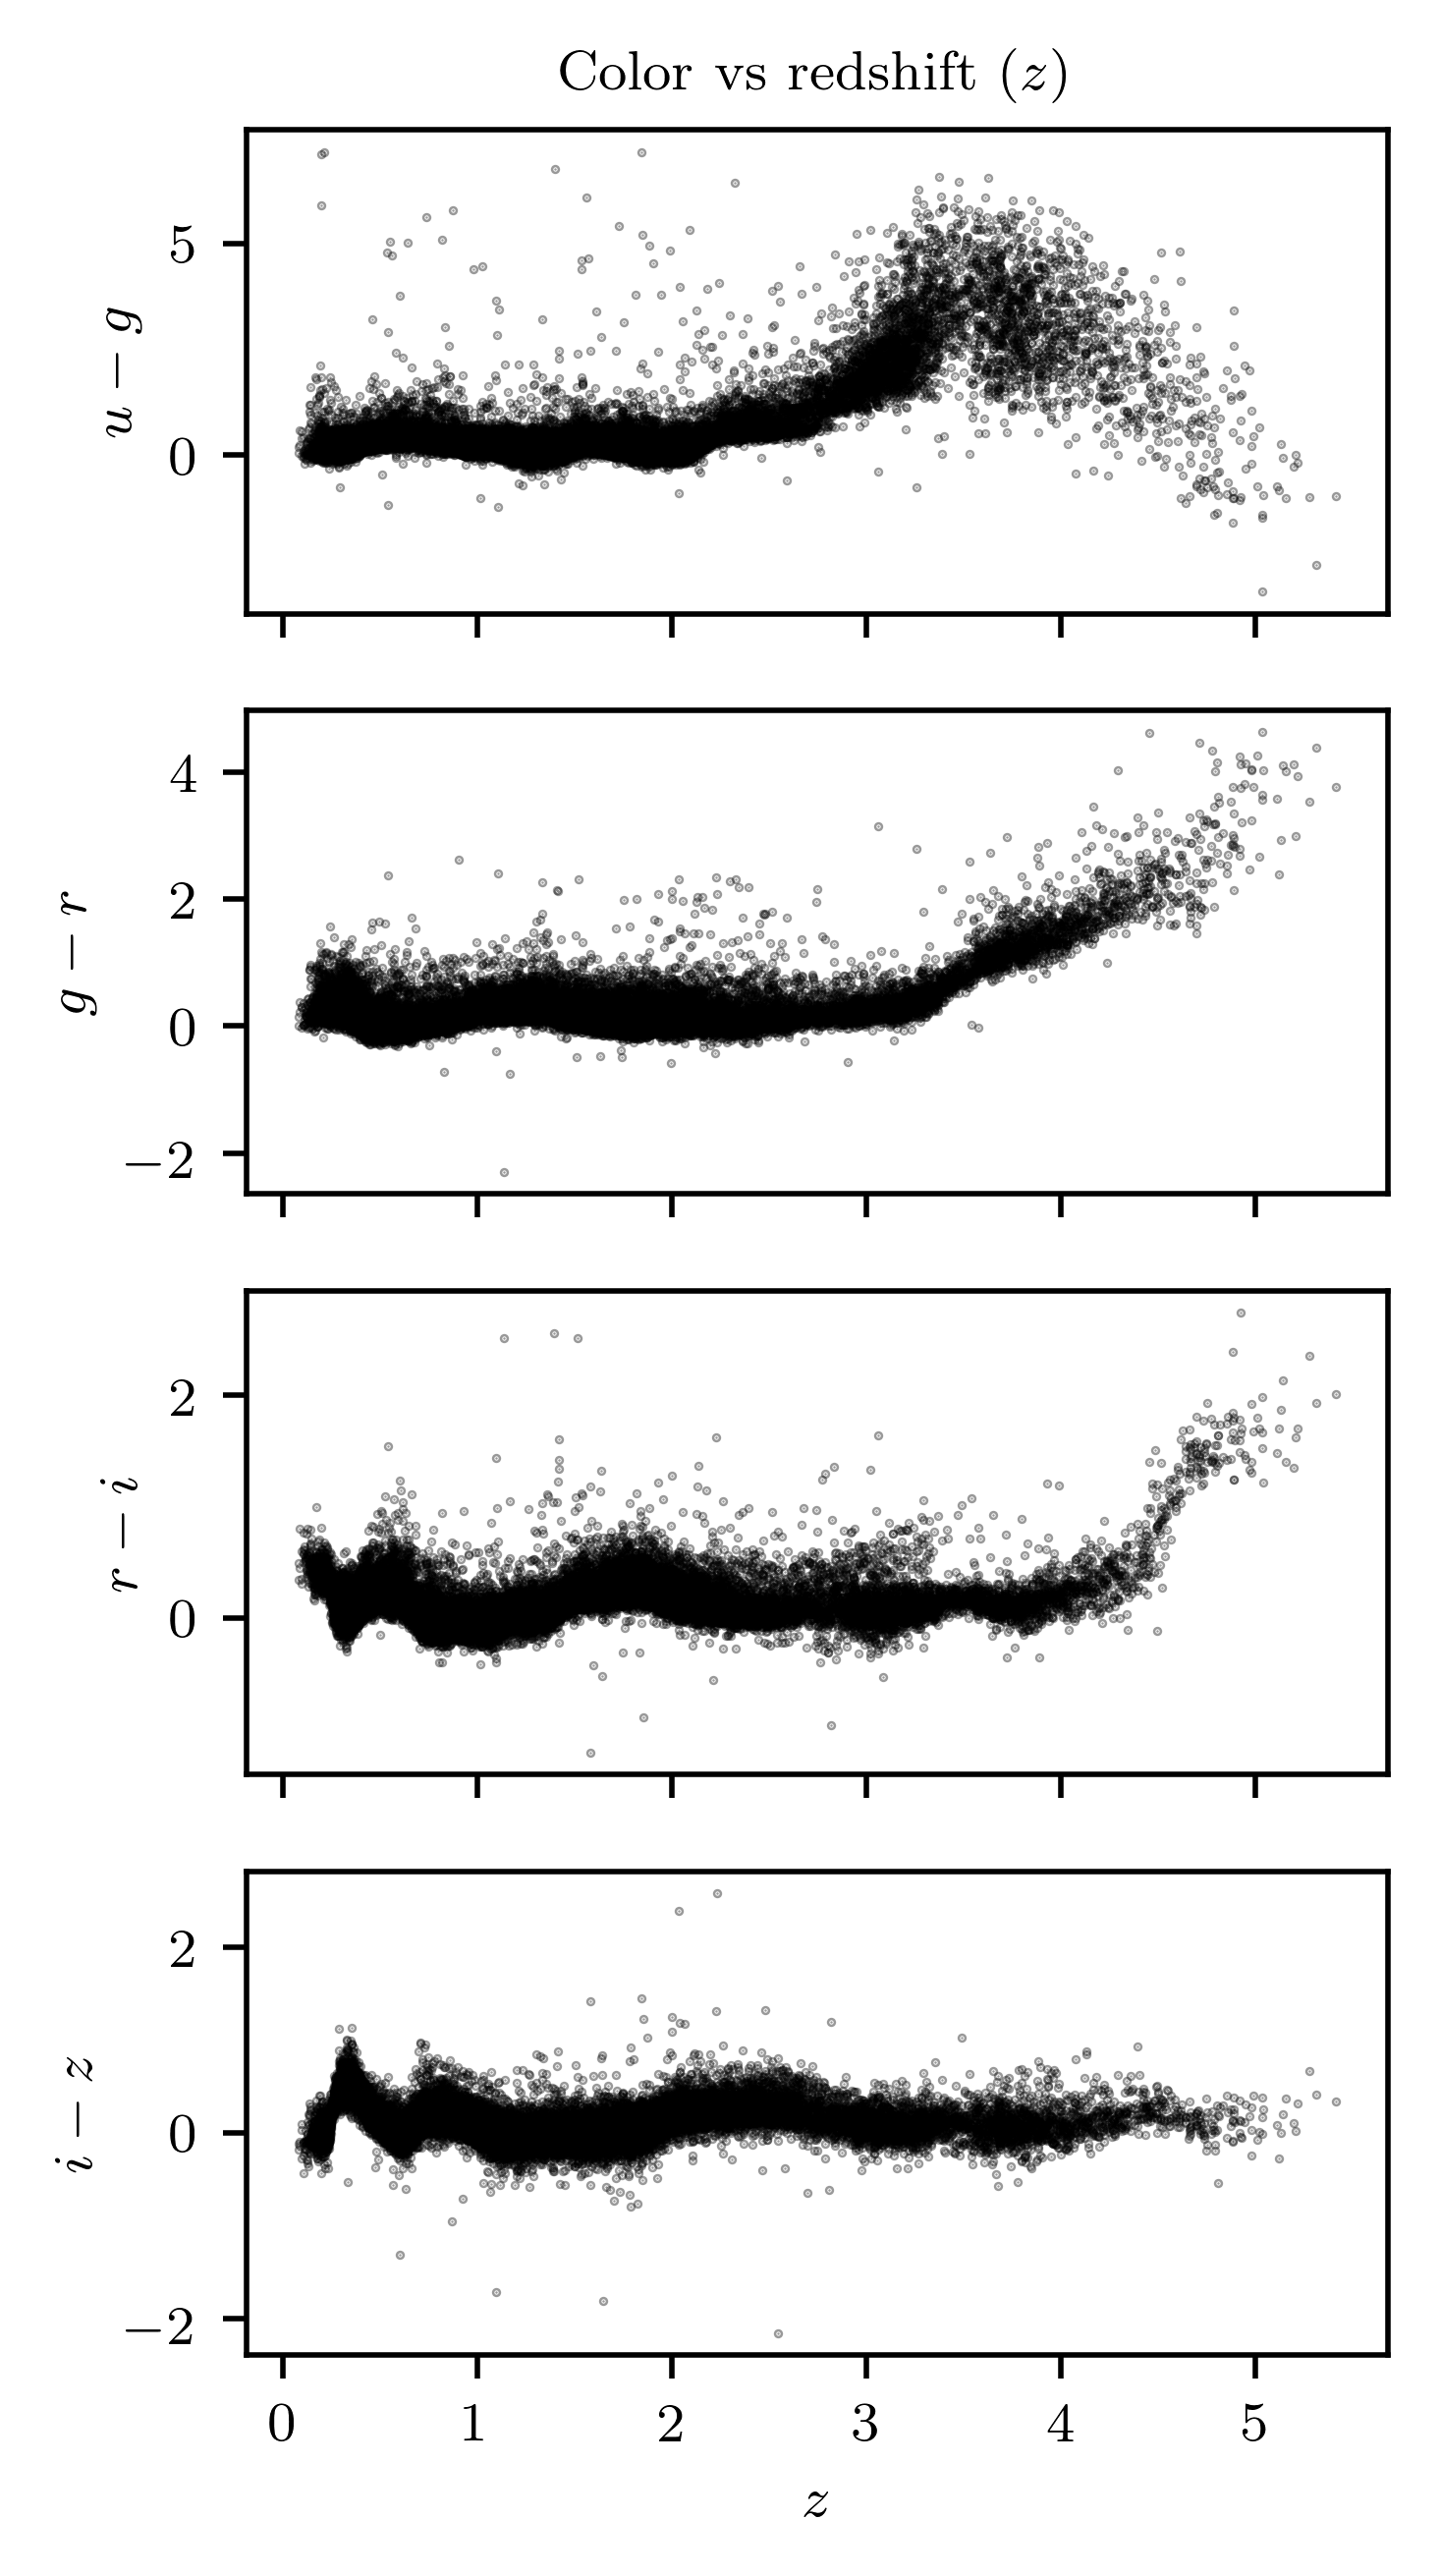

In [330]:
# Regression on color vs z

bands = ['u_mag', 'g_mag', 'r_mag', 'i_mag', 'z_mag']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(dpi = 500, nrows = 4,
                                         sharex = True, figsize = (3, 6));
axes = [ax1, ax2, ax3, ax4]

for i in range(len(bands) - 1):
    axes[i].scatter(raw_data['z'], raw_data[bands[i]] - raw_data[bands[i+1]],
                    marker = '.', s = 0.5, alpha = 0.4, c = 'k');
    axes[i].set_ylabel('${0} - {1}$'.format(bands[i][0], bands[i+1][0]))

ax4.set_xlabel("$z$");
ax1.set_title('Color vs redshift ($z$)');
plt.savefig('figures/color-redshift.png');

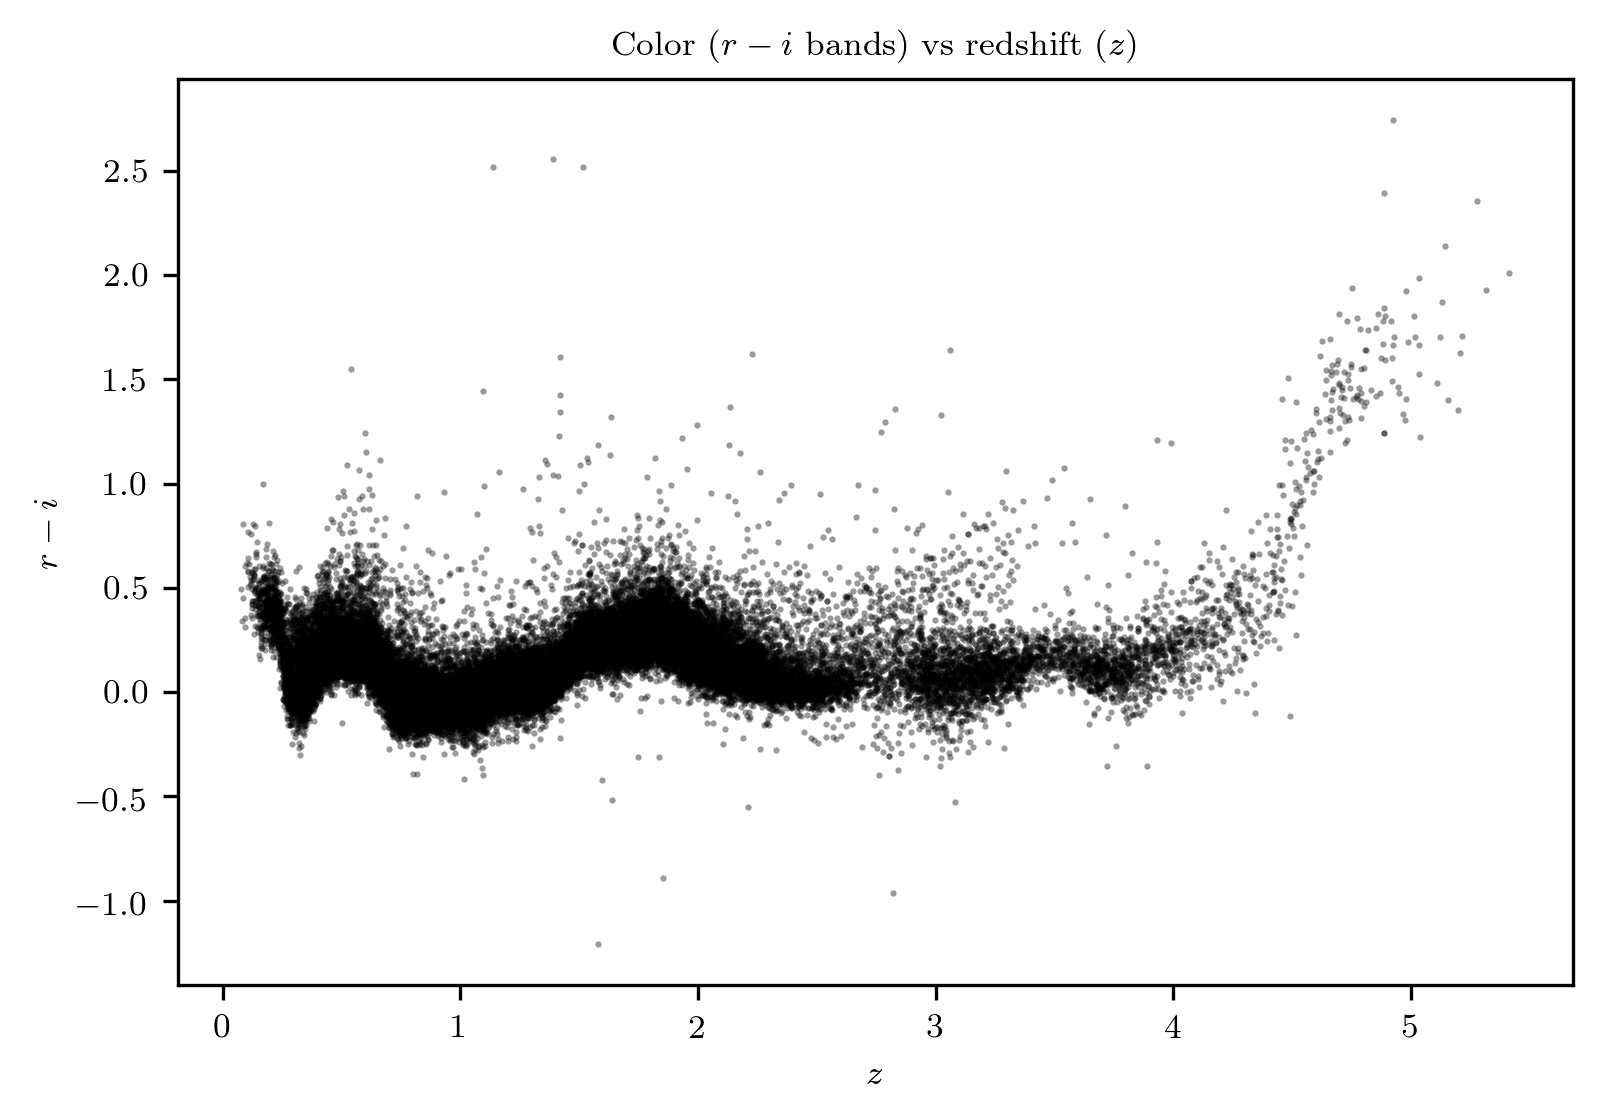

In [302]:
# Regression on r-i vs z

fig, ax = plt.subplots(dpi = 300);

ax.scatter(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'],
           marker = '.', s = 1, alpha = 0.4, c = 'k');
ax.set_xlabel('$z$');
ax.set_ylabel('$r - i$');
ax.set_title('Color ($r - i$ bands) vs redshift ($z$)');
plt.savefig('figures/ri-redshift.pdf');

In [334]:
degree = range(0,15)

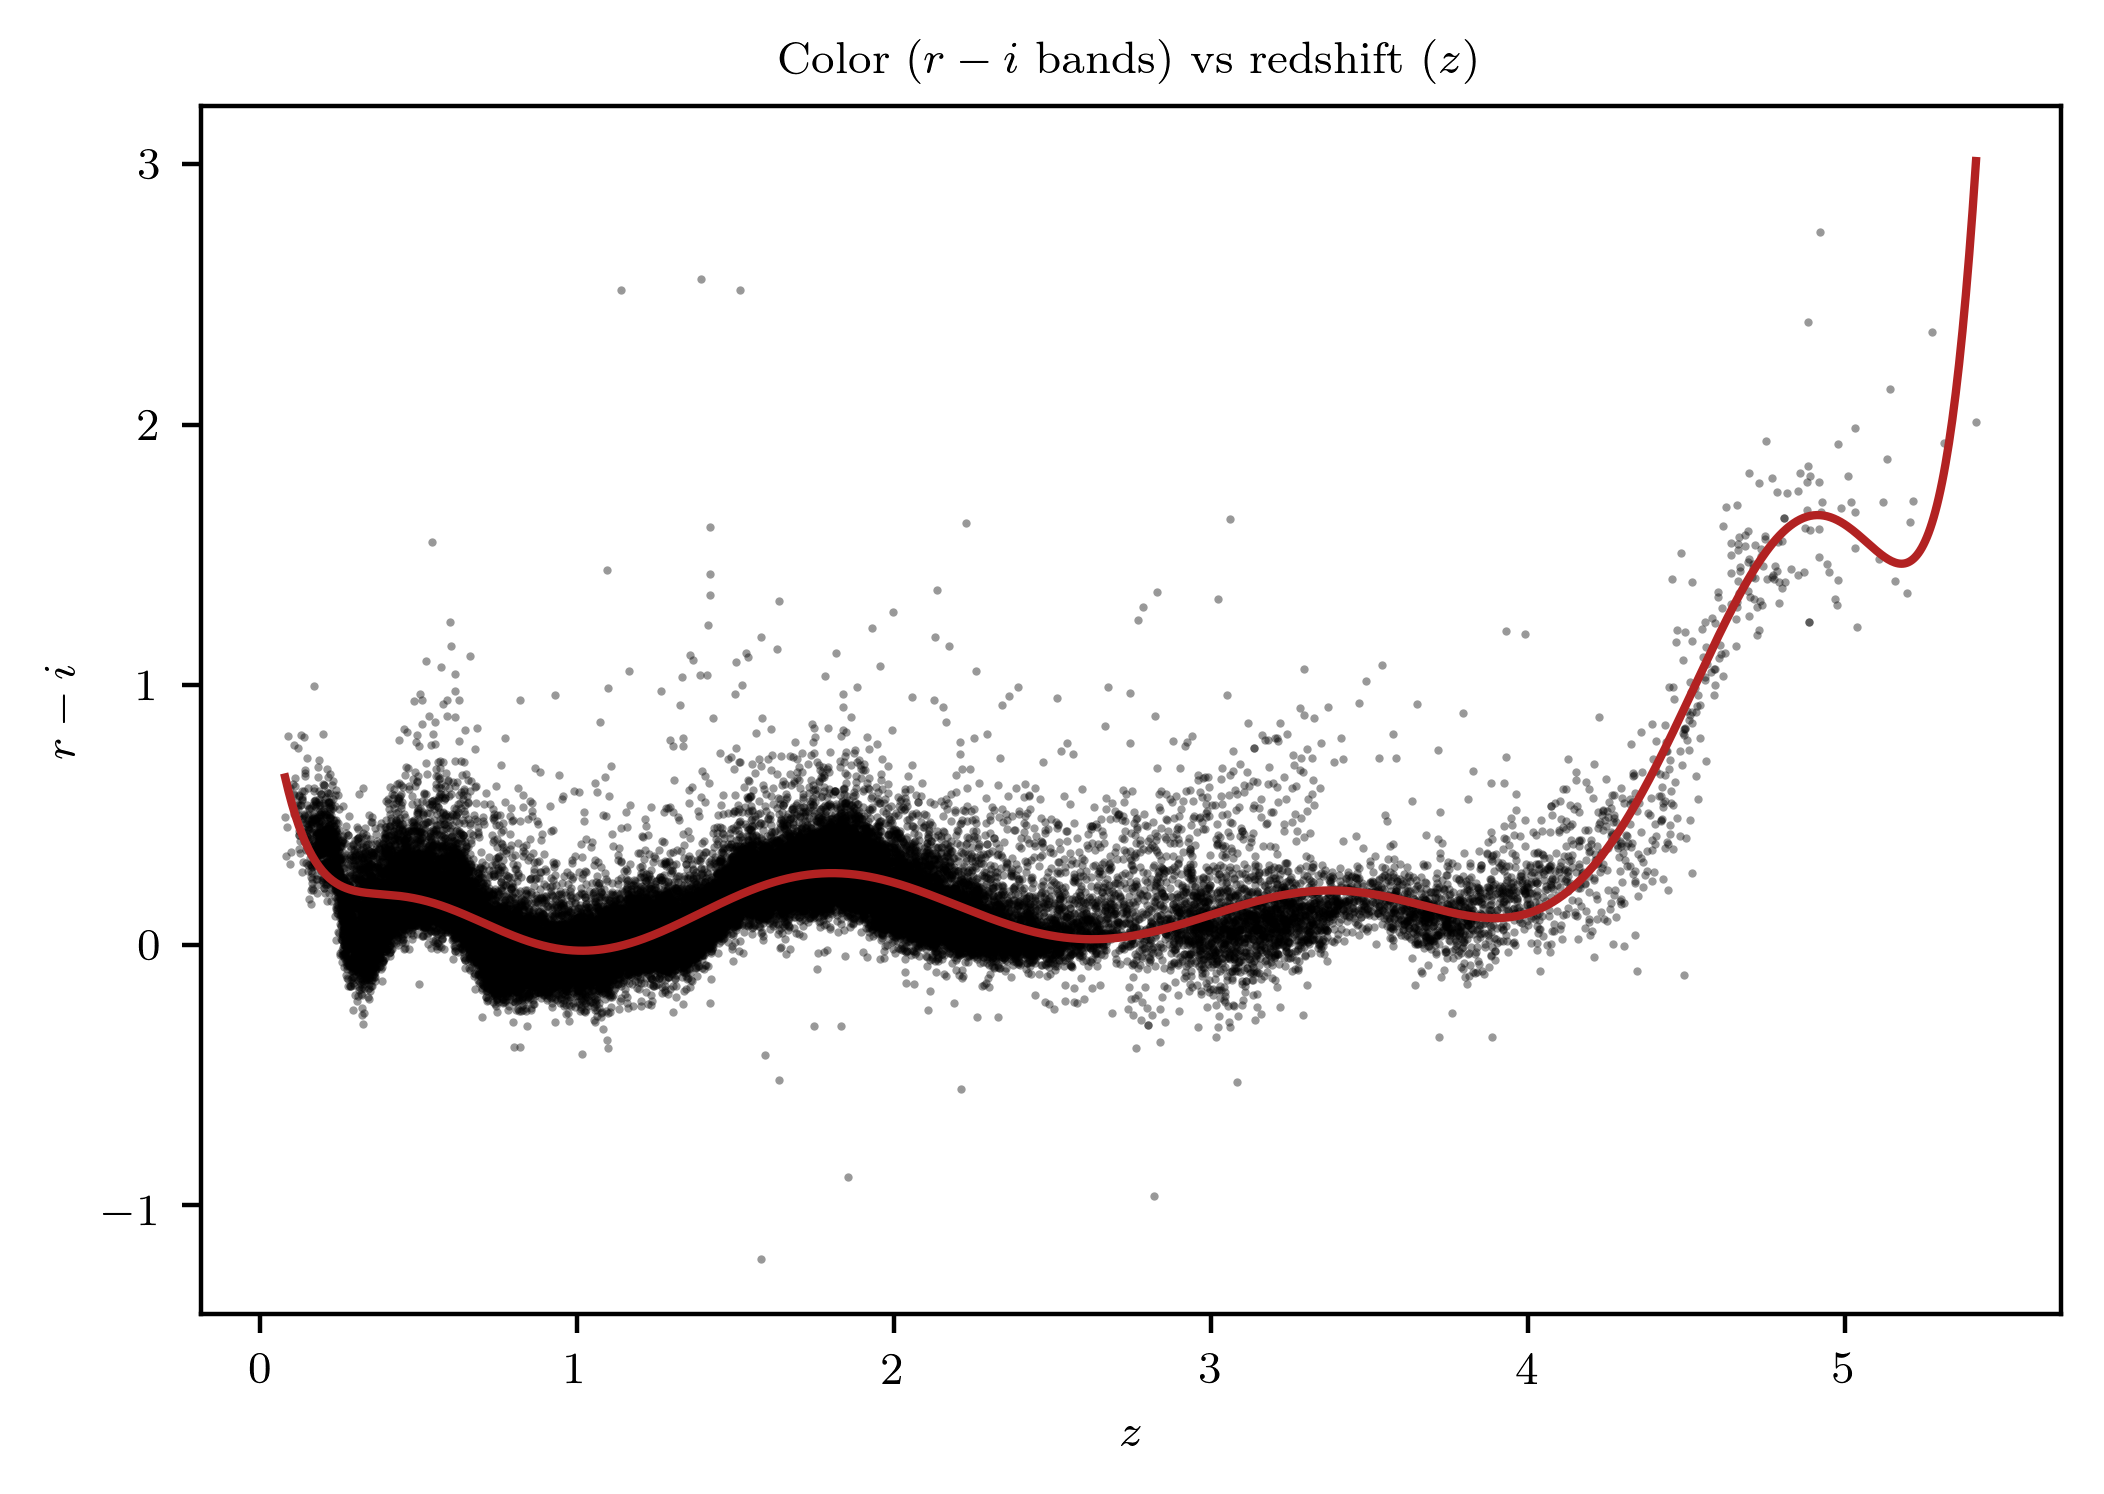

In [377]:
fig, ax = plt.subplots(dpi = 400);

poly = np.polyfit(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'], 10);

z_fit = np.linspace(np.min(raw_data['z']), np.max(raw_data['z']), 1000)
color_fit = np.polyval(poly, z_fit);

ax.scatter(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'],
           marker = '.', s = 1, alpha = 0.4, c = 'k');
ax.plot(z_fit, color_fit, color = 'firebrick', lw = 1.5);
ax.set_xlabel('$z$');
ax.set_ylabel('$r - i$');
ax.set_title('Color ($r - i$ bands) vs redshift ($z$)');
plt.savefig('figures/ri-redshift-deg0.pdf');

In [468]:
# Fit values
deg = np.arange(0,16)

chi_sq_arr = np.zeros(len(deg))
res_arr = np.zeros(len(deg))

for i, d in enumerate(deg):
    p = np.polyfit(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'], d)
    chi_sq_arr[i] = np.sum((np.polyval(p, raw_data['z'])-(raw_data['r_mag'] - raw_data['i_mag']))**2/1.3**2)
    res_arr[i] = np.sum((np.polyval(p, raw_data['z'])-(raw_data['r_mag'] - raw_data['i_mag']))**2)

bic=np.log(len(raw_data['z']))*(deg+1)+chi_sq_arr
bic=bic-np.amin(bic)

aic=2*(deg+1)+chi_sq_arr
aic=aic-np.amin(aic)

r=1-(res_arr/(len(raw_data['z'])*np.var((raw_data['r_mag'] - raw_data['i_mag']), ddof=0)))
r_adj=1-(1-r)*(len(raw_data['z'])-1)/(len(raw_data['z'])-(deg+1)-1)

chi_sq_arr=chi_sq_arr/(len(raw_data['z'])-deg-1)

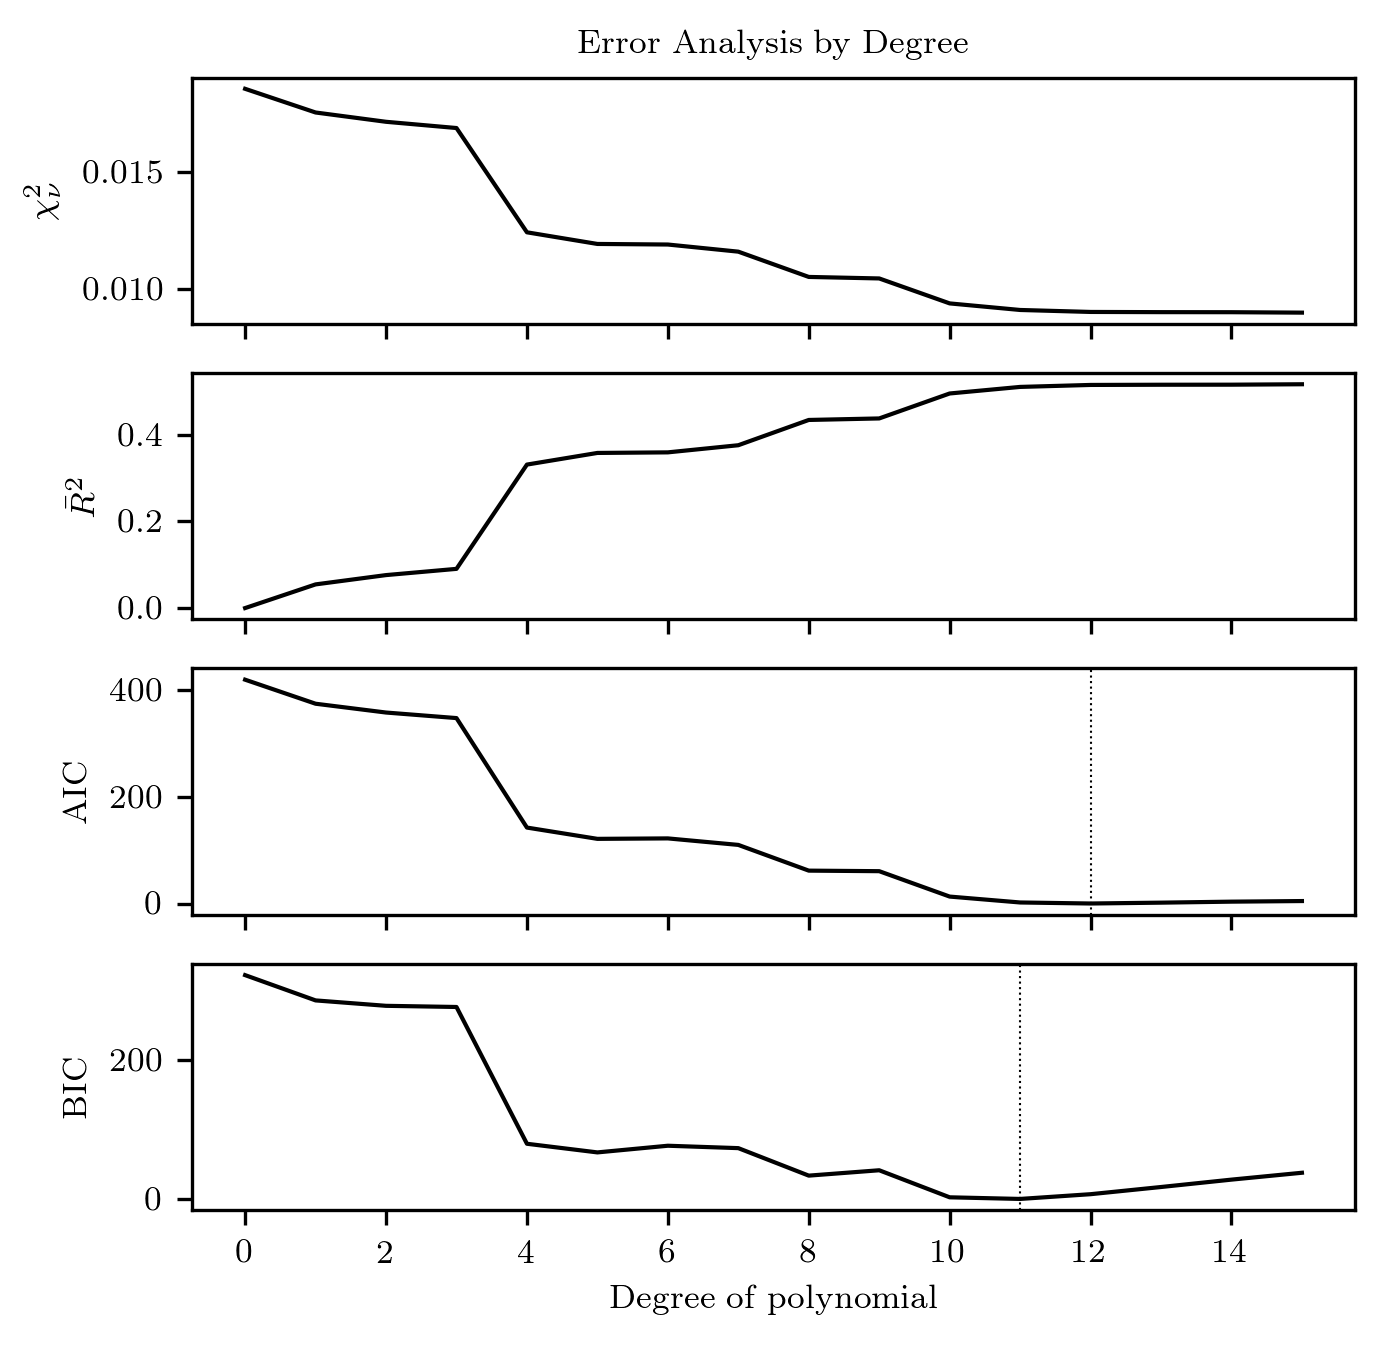

In [478]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(dpi = 300, sharex = True, nrows = 4, figsize = (5, 5));

ax1.plot(deg, chi_sq_arr, color = 'k', lw = 1);
ax1.set_ylabel("$\\chi^2_\\nu$");
ax1.set_title("Error Analysis by Degree");

ax2.plot(deg, r_adj, color = 'k', lw = 1);
ax2.set_ylabel("$\\bar{R}^2$");

ax3.plot(deg, aic, color = 'k', lw = 1);
ax3.set_ylabel("AIC");
ax3.axvline(x = 12, c = 'k', linestyle = ':', lw = 0.5);

ax4.plot(deg, bic, color = 'k', lw = 1);
ax4.set_ylabel("BIC");
ax4.set_xlabel("Degree of polynomial");
ax4.axvline(x = 11, c = 'k', linestyle = ':', lw = 0.5);

plt.savefig("figures/reg-err.pdf");

In [502]:
# Cross validation
deg = np.arange(0,16)

n_iter = 50
chi_train = np.zeros(len(deg))
chi_test = np.zeros(len(deg))

for i, d in enumerate(deg):
    for l in range(n_iter):
        # Separate data into training and testing
        training_mask = np.zeros(len(raw_data['z']), dtype = np.bool)
        training_mask[:len(training_mask) // 2] = True
        np.random.shuffle(training_mask)
        test_mask = ~training_mask
        
        # Fit polynomial to data
        x_train = raw_data['z'][training_mask]
        x_test = raw_data['z'][test_mask]
        y_train = raw_data['r_mag'][training_mask] - raw_data['i_mag'][training_mask]
        y_test = raw_data['r_mag'][test_mask] - raw_data['i_mag'][test_mask]
        
        poly = np.polyfit(x_train, y_train, d)
        chi_train[i] += np.sum((np.polyval(poly, x_train) - (y_train))**2/1.3**2)
        chi_test[i] += np.sum((np.polyval(poly, x_test) - (y_test))**2/1.3**2)

chi_train = chi_train / n_iter
chi_test= chi_test / n_iter

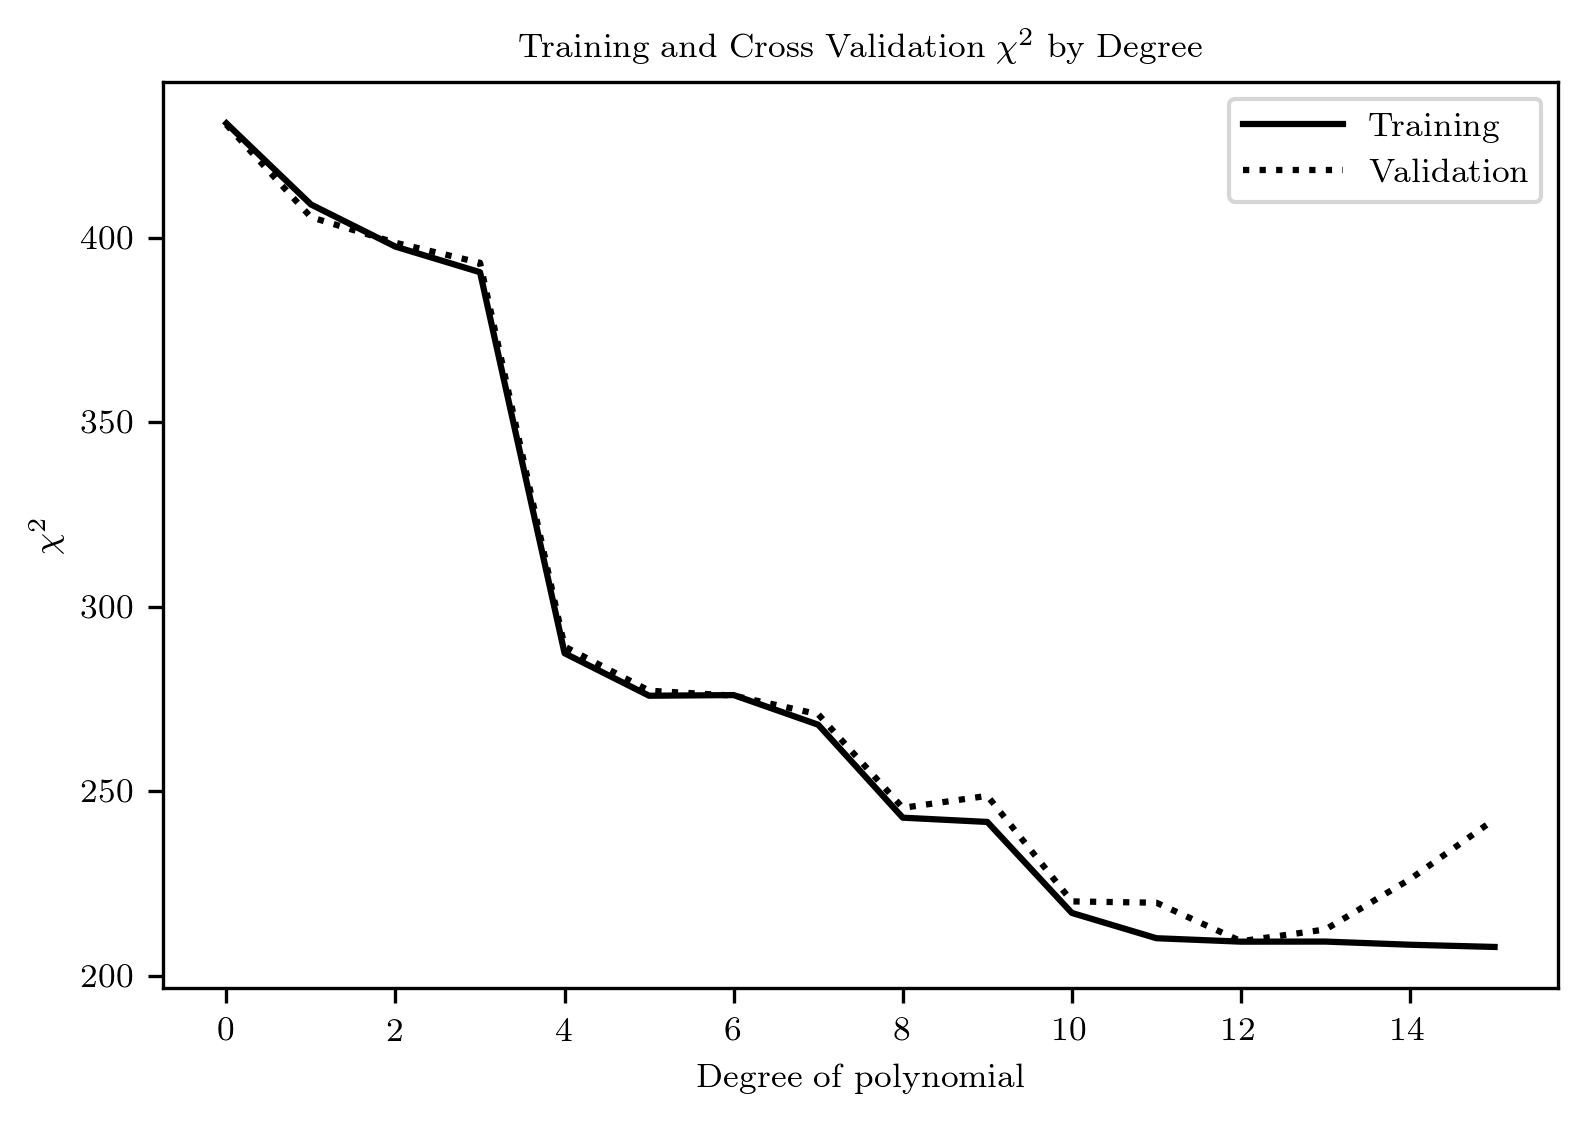

In [503]:
fig, ax = plt.subplots(dpi = 300);

ax.plot(deg, chi_train, color = 'k', label = 'Training');
ax.plot(deg, chi_test, color = 'k', linestyle = ':', label = 'Validation');
ax.set_ylabel('$\\chi^2$');
ax.set_xlabel('Degree of polynomial');
ax.set_title('Training and Cross Validation $\chi^2$ by Degree');
ax.legend(loc = 'best');

plt.savefig('figures/cross-val.pdf')

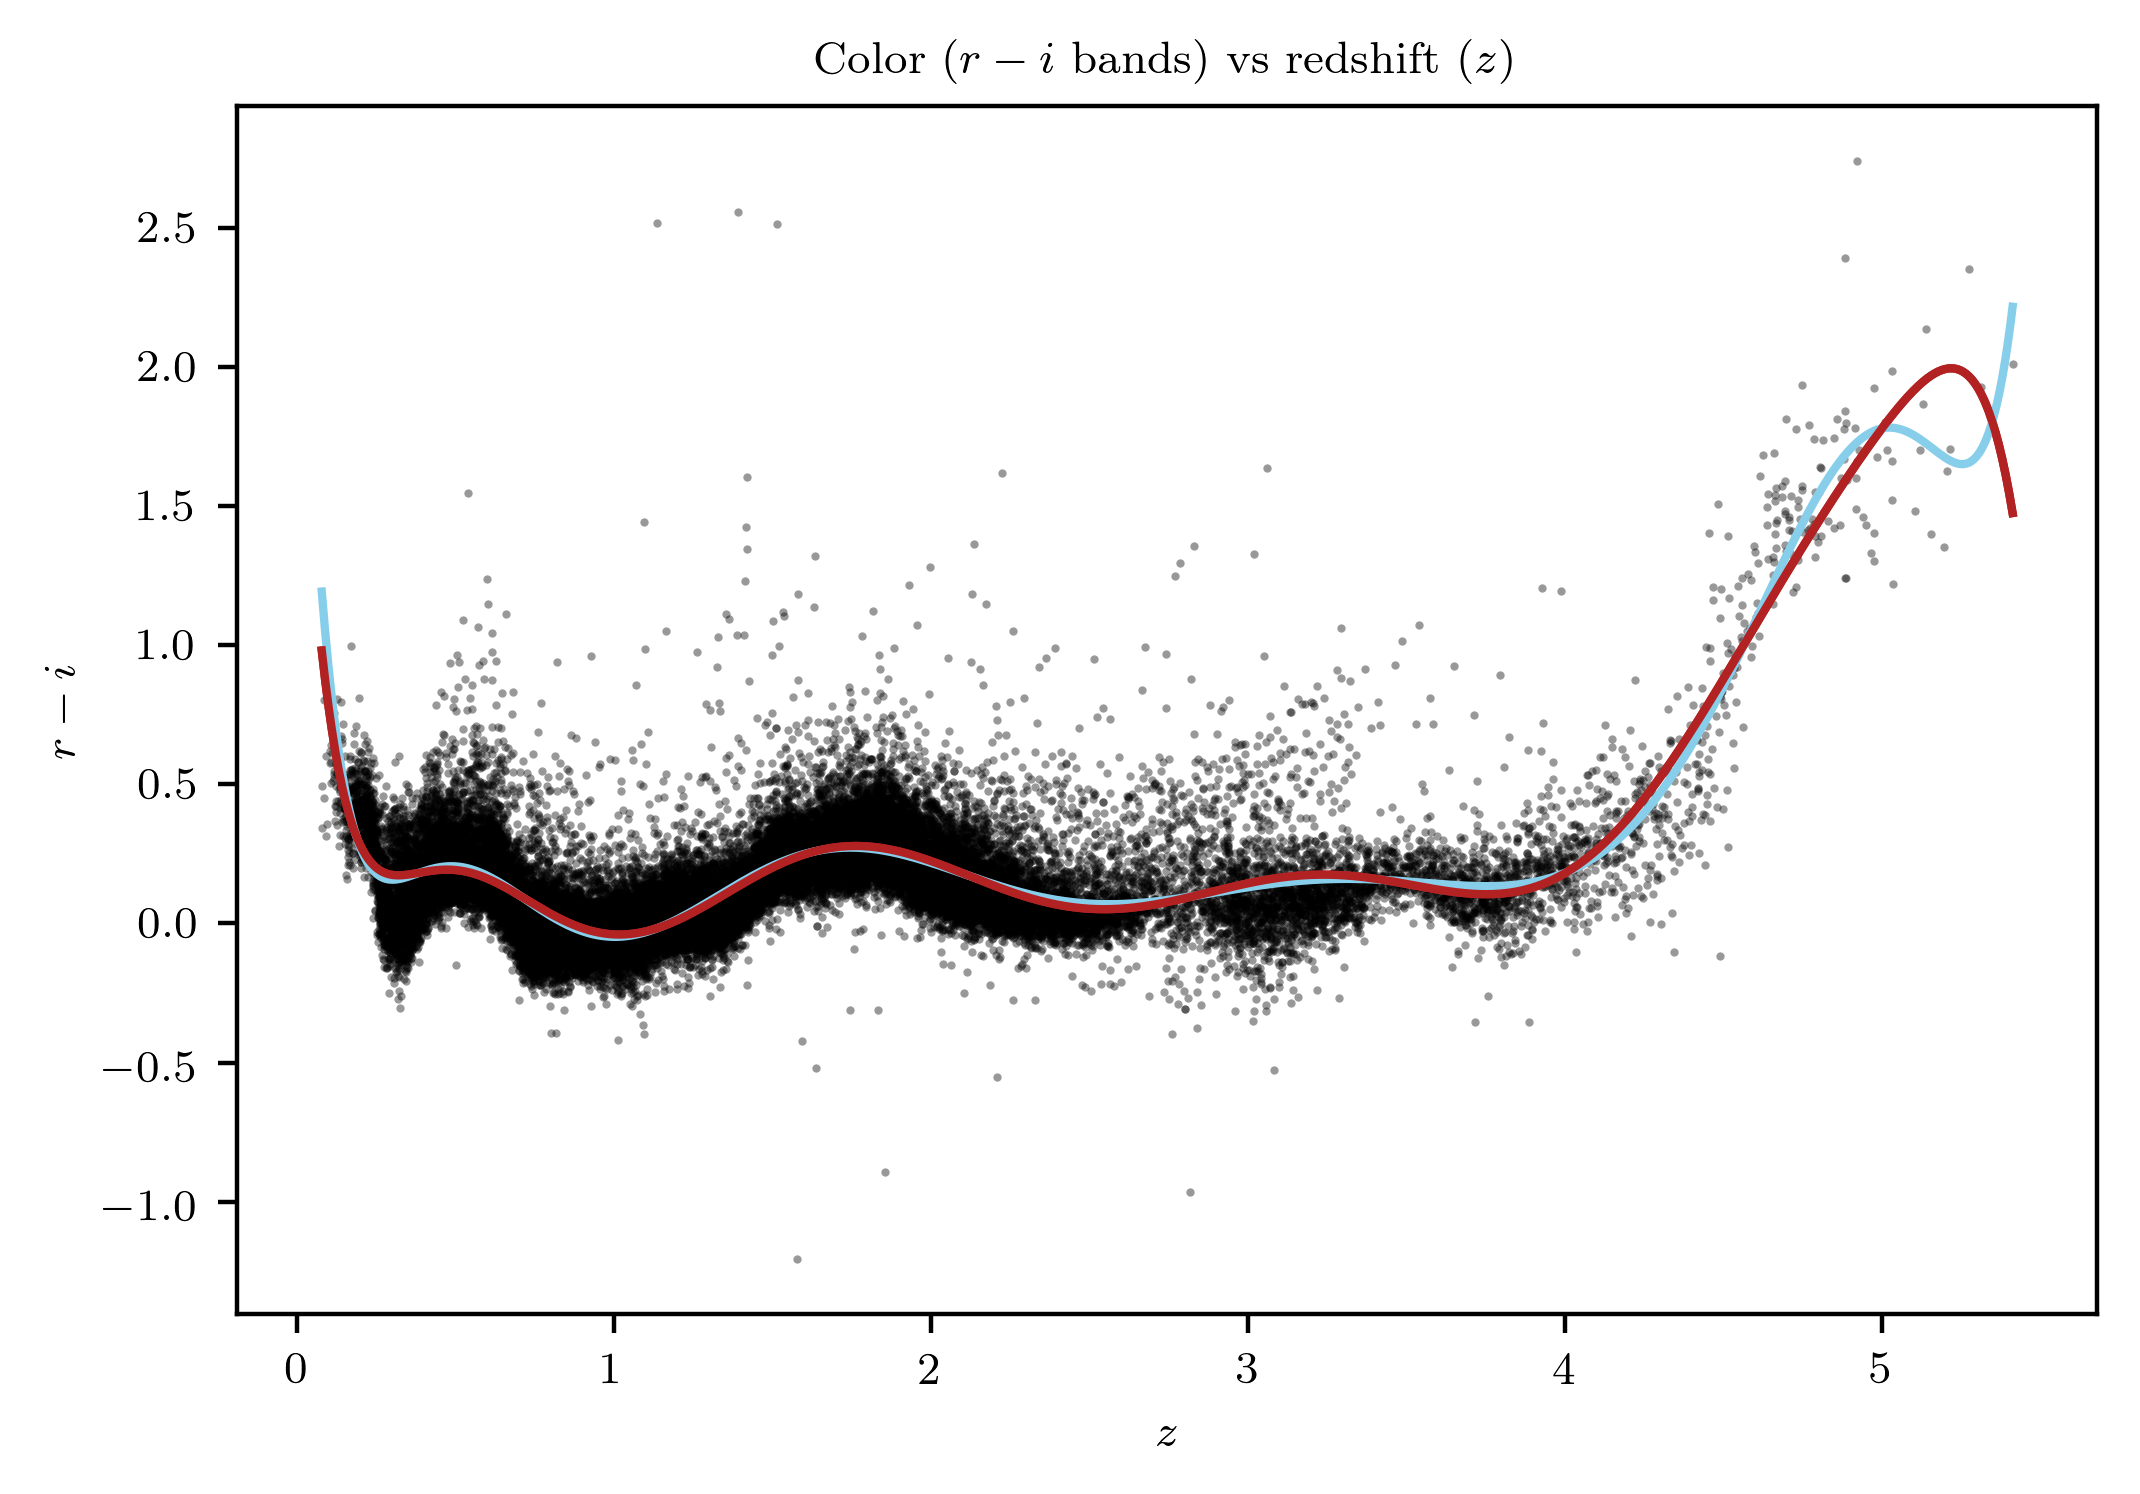

In [487]:
fig, ax = plt.subplots(dpi = 400);

elev_deg = np.polyfit(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'], 11);
twel_deg = np.polyfit(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'], 12);

z_fit = np.linspace(np.min(raw_data['z']), np.max(raw_data['z']), 1000)

color_fit_e = np.polyval(elev_deg, z_fit);
color_fit_t = np.polyval(twel_deg, z_fit);

ax.scatter(raw_data['z'], raw_data['r_mag'] - raw_data['i_mag'],
           marker = '.', s = 1, alpha = 0.4, c = 'k');
ax.plot(z_fit, color_fit_e, color = 'firebrick', lw = 1.5);
ax.plot(z_fit, color_fit_t, color = 'skyblue', lw = 1.5);
ax.plot(z_fit, color_fit_e, color = 'firebrick', lw = 1.5);
ax.set_xlabel('$z$');
ax.set_ylabel('$r - i$');
ax.set_title('Color ($r - i$ bands) vs redshift ($z$)');
plt.savefig('figures/ri-redshift-deg.pdf');

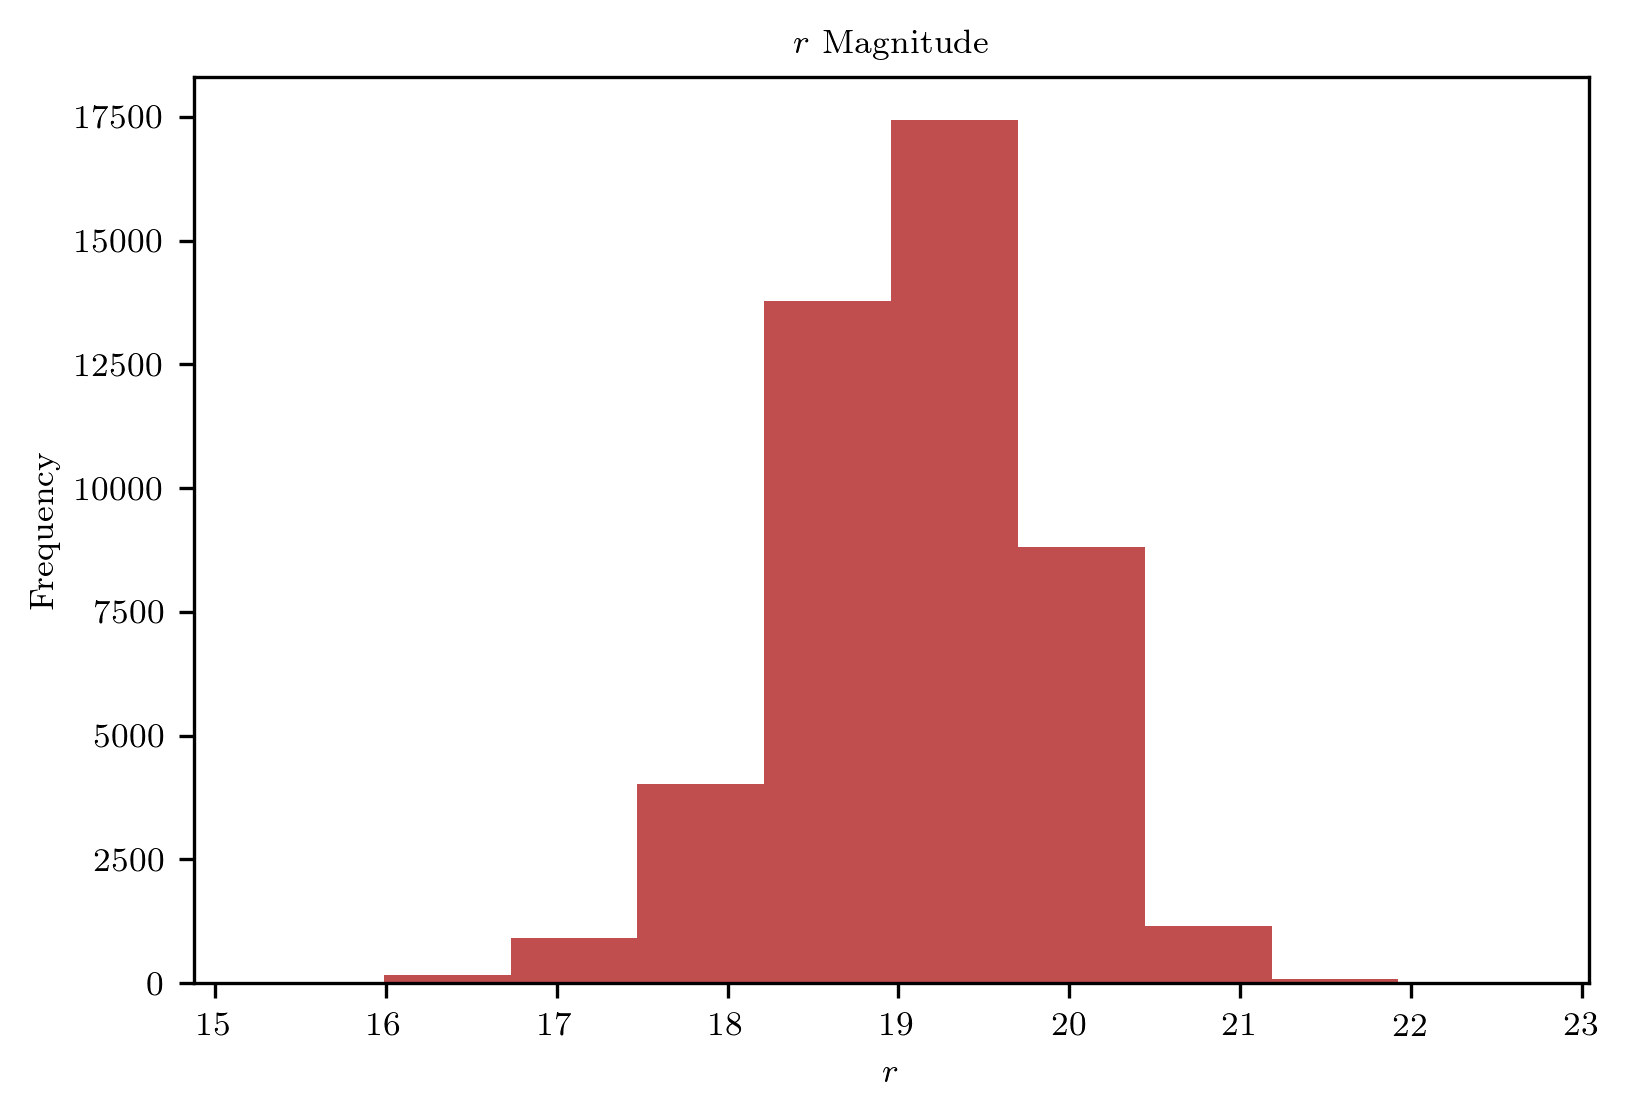

In [394]:
fig, ax = plt.subplots(dpi = 300);
ax.hist(raw_data['r_mag'], color = 'firebrick', alpha = 0.8);
ax.set_ylabel('Frequency');
ax.set_xlabel('$r$');
ax.set_title('$r$ Magnitude');

plt.savefig('figures/hist.pdf');

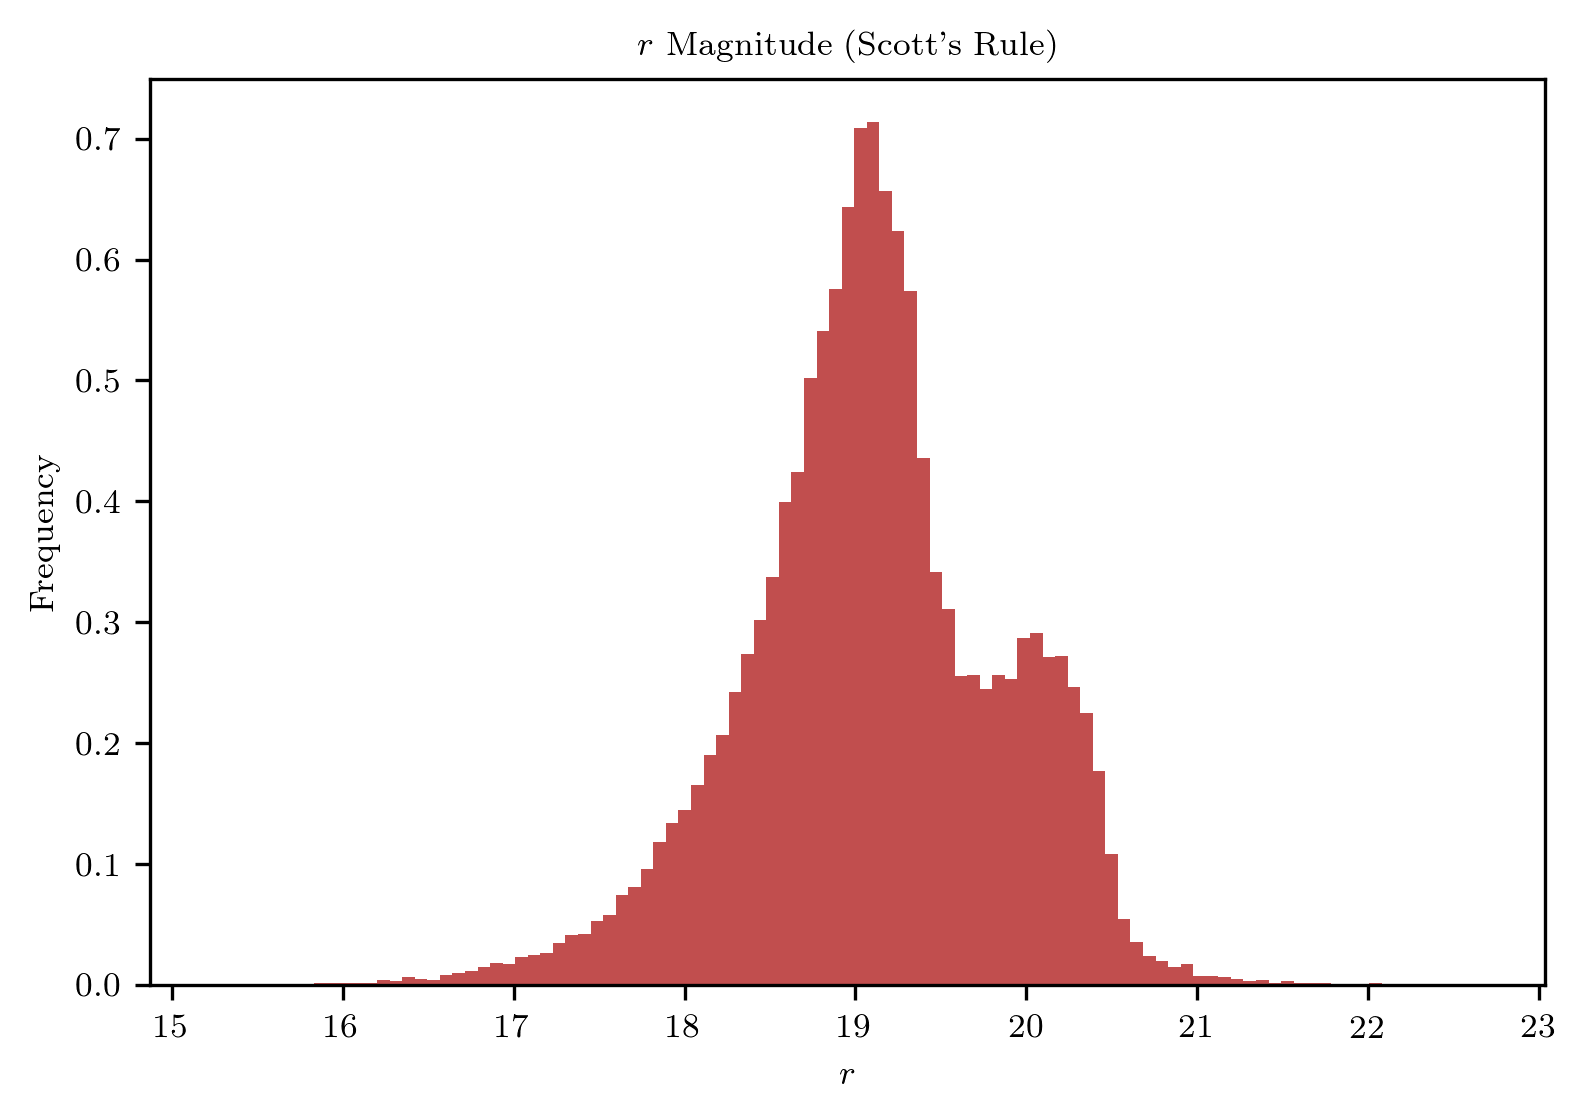

In [448]:
fig, ax = plt.subplots(dpi = 300);
ax.hist(raw_data['r_mag'], color = 'firebrick', alpha = 0.8, bins = 'scott', normed = True);
ax.set_ylabel('Frequency');
ax.set_xlabel('$r$');
ax.set_title('$r$ Magnitude (Scott\'s Rule)');

plt.savefig('figures/hist-scott.pdf');

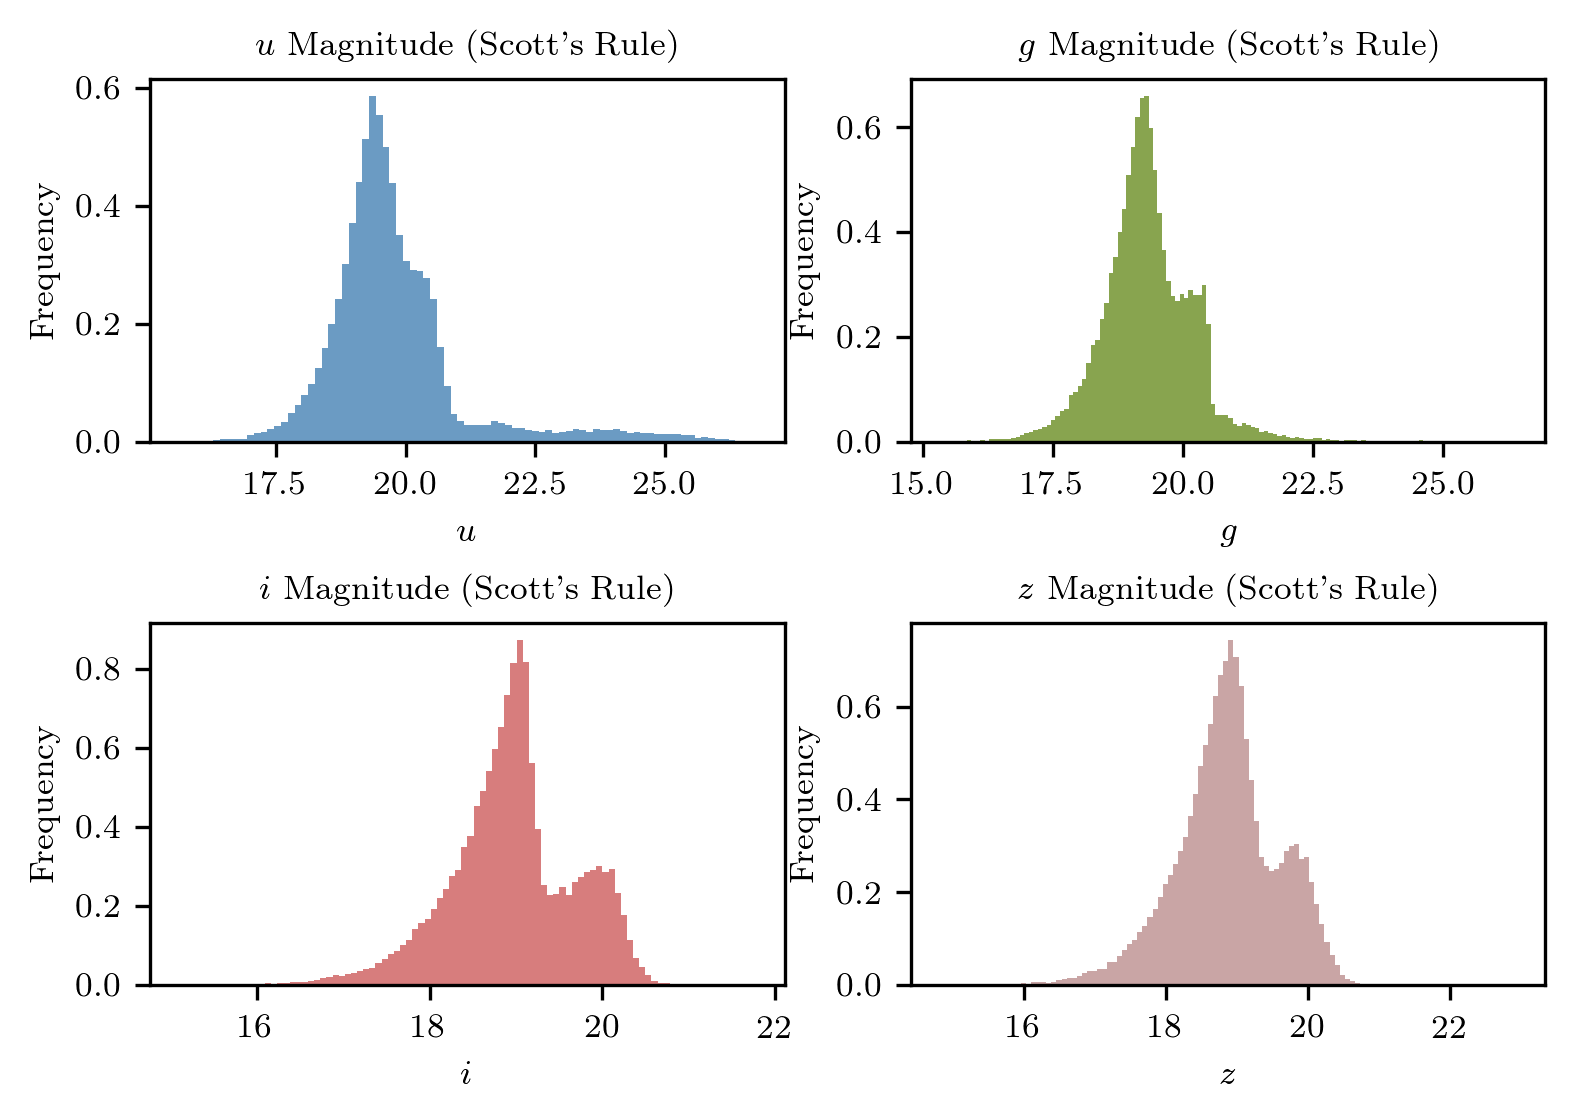

In [447]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(dpi = 300, nrows = 2, ncols = 2);
fig.subplots_adjust(hspace=.5)

ax1.hist(raw_data['u_mag'], color = 'steelblue', alpha = 0.8, bins = 'scott', normed = True);
ax1.set_ylabel('Frequency');
ax1.set_xlabel('$u$');
ax1.set_title('$u$ Magnitude (Scott\'s Rule)');

ax2.hist(raw_data['g_mag'], color = 'olivedrab', alpha = 0.8, bins = 'scott', normed = True);
ax2.set_ylabel('Frequency');
ax2.set_xlabel('$g$');
ax2.set_title('$g$ Magnitude (Scott\'s Rule)');

ax3.hist(raw_data['i_mag'], color = 'indianred', alpha = 0.8, bins = 'scott', normed = True);
ax3.set_ylabel('Frequency');
ax3.set_xlabel('$i$');
ax3.set_title('$i$ Magnitude (Scott\'s Rule)');

ax4.hist(raw_data['z_mag'], color = 'rosybrown', alpha = 0.8, bins = 'scott', normed = True);
ax4.set_ylabel('Frequency');
ax4.set_xlabel('$z$');
ax4.set_title('$z$ Magnitude (Scott\'s Rule)');

plt.savefig('figures/hist-colors.pdf');

In [408]:
# Normality test
A, crit, sig = scipy.stats.anderson(raw_data['r_mag']);

print(A, crit, sig)

W, p = scipy.stats.shapiro(raw_data['r_mag']);

print(W, p)

129.4106728816114 [0.576 0.656 0.787 0.918 1.092] [15.  10.   5.   2.5  1. ]
0.9896337985992432 0.0


/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


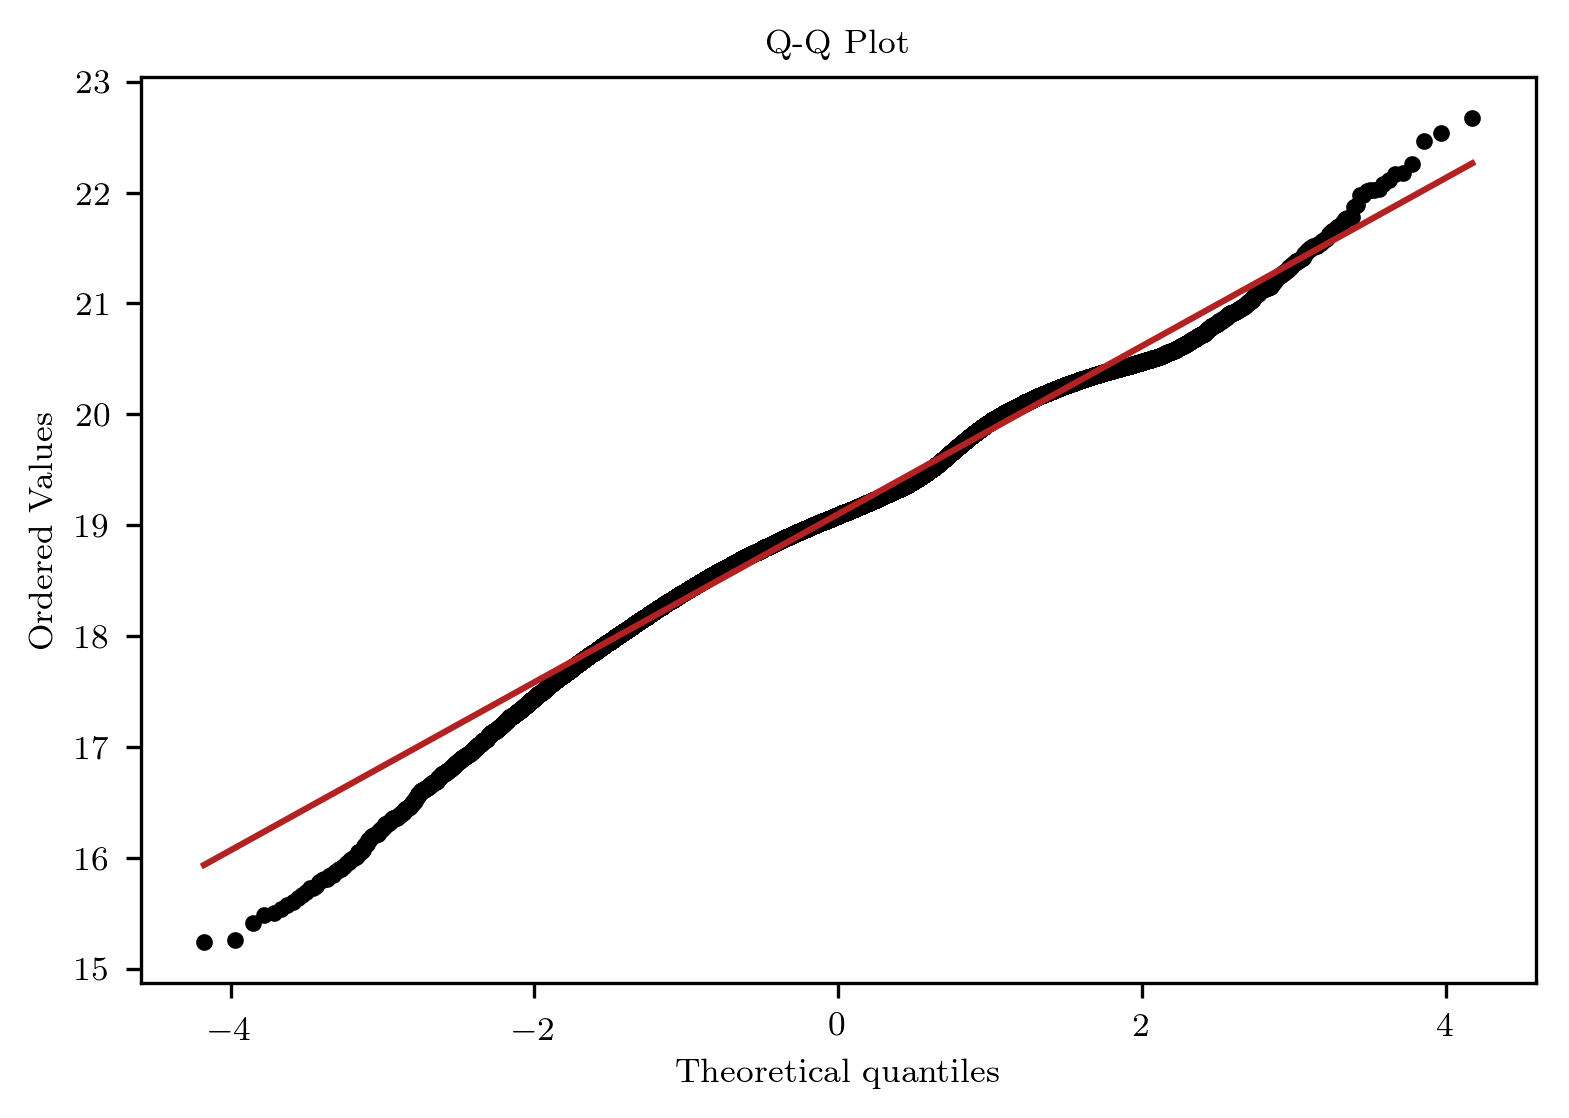

In [420]:
fig, ax = plt.subplots(dpi = 300)

scipy.stats.probplot(raw_data['r_mag'], plot = ax);
ax.set_title('Q-Q Plot');
ax.get_lines()[0].set_marker('.');
ax.get_lines()[0].set_color('k');

ax.get_lines()[1].set_color('firebrick');
ax.get_lines()[1].set_linewidth(1.5);

plt.savefig('figures/qq-plot.pdf');